# Árboles de Decisión: Comparación de Profundidades

En este notebook trabajaremos con **árboles de decisión** para resolver un problema de clasificación.

Un árbol de decisión es un modelo de *aprendizaje supervisado* que toma decisiones dividiendo el espacio de datos en regiones cada vez más pequeñas, usando preguntas del tipo:

> ¿La característica X es mayor o menor que un cierto valor?

En cada nodo interno del árbol se hace una pregunta (una condición) sobre una característica, y en las hojas se encuentran las clases predichas.

**Objetivo del ejercicio**

1. Cargar un dataset provisto por el profesor.
2. Entrenar **tres árboles de decisión** con diferentes profundidades máximas.
3. Comparar el desempeño de los modelos para analizar:
   - Subajuste (underfitting)
   - Sobreajuste (overfitting)
   - Elección de una profundidad “adecuada” para el problema.


## 2️⃣ Carga y exploración del dataset

En esta sección debes:

1. Cargar el dataset mmnist_train desde un archivo (por ejemplo, CSV).
2. Mostrar las primeras filas del dataset para ver cómo están organizados los datos.
3. Indicar:
   - Cuántas filas tiene el dataset.
   - Cuántas columnas tiene el dataset.
4. Revisar si existen valores nulos o faltantes en alguna columna.
5. Escribir un breve comentario describiendo:
   - Qué representa cada fila.
   - Qué tipo de información contienen las columnas (en términos generales).


In [1]:
import pandas as pd

# 1. Cargar el dataset
df = pd.read_csv('mnist_train.csv')

# 2. Mostrar las primeras filas
display(df.head())

# 3. Indicar dimensiones
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")

# 4. Revisar valores nulos
nulos = df.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {nulos}")

# 5. Comentario descriptivo
# - Cada fila representa una imagen de un dígito manuscrito de 28x28 pixeles (aplanada en 784 valores).
# - La columna 'label' contiene el dígito real (la clase a predecir).
# - Las columnas 'data_0' a 'data_783' contienen la intensidad del pixel (0 a 255) en escala de grises.

,label,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,...,data_774,data_775,data_776,data_777,data_778,data_779,data_780,data_781,data_782,data_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


El dataset tiene 55000 filas y 785 columnas.
Total de valores nulos en el dataset: 0


## 3️⃣ Preparación de las variables (X y y)

En esta sección debes:

1. Identificar que **X** son las imágenes (flattened: 784 pixeles).  
2. Identificar que **y** son las etiquetas (dígitos 0–9).  
3. Mostrar cuántas clases distintas hay en y.  
4. Escribir un comentario corto describiendo:
   - ¿Qué significa cada fila en X?
   - ¿Qué representa y?



In [2]:
# 1. Identificar X (todas las columnas menos 'label')
X = df.drop('label', axis=1)

# 2. Identificar y (la columna 'label')
y = df['label']

# 3. Mostrar clases distintas
clases = sorted(y.unique())
print(f"Hay {len(clases)} clases distintas en y: {clases}")

# 4. Comentarios
# - Cada fila en X es un vector de 784 dimensiones que representa la intensidad de los pixeles de una imagen.
# - La variable y representa la categoría o dígito que se muestra en la imagen (del 0 al 9).

Hay 10 clases distintas en y: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


## 4️⃣ División en entrenamiento y prueba

En esta sección debes:

1. Dividir los datos en:
   - 80% entrenamiento  
   - 20% prueba  
2. Usar `random_state` fijo para reproducibilidad.
3. Estratificar usando y, para mantener las proporciones de cada dígito.
4. Mostrar:
   - Cantidad de ejemplos en entrenamiento.
   - Cantidad de ejemplos en prueba.


In [3]:
from sklearn.model_selection import train_test_split

# 1, 2 y 3. Dividir los datos (80% train, 20% test) con semilla y estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 4. Mostrar cantidades
print(f"Cantidad de ejemplos en entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de ejemplos en prueba: {X_test.shape[0]}")

Cantidad de ejemplos en entrenamiento: 44000
Cantidad de ejemplos en prueba: 11000


## 5️⃣ Definir las profundidades a evaluar

En esta sección debes:

1. Elegir **tres profundidades** para evaluar.  
   Recomendación para MNIST:  
   - 5  
   - 10  
   - 20  
*(Puedes ajustar)*

2. Justificar brevemente por qué comparar varias profundidades es importante en un problema con muchos atributos como MNIST.



In [4]:
# 1. Elegir tres profundidades
profundidades = [5, 10, 20]

# 2. Justificación
# Es importante comparar profundidades porque:
# - Una profundidad baja (ej. 5) puede resultar en un modelo muy simple que no capture los detalles (subajuste).
# - Una profundidad alta (ej. 20) permite al árbol memorizar detalles del set de entrenamiento, pero puede fallar con datos nuevos (sobreajuste).
# - Buscamos el punto medio donde generalice mejor.

## 6️⃣ Entrenamiento de los modelos (tres profundidades)

En esta sección debes entrenar **tres modelos de árbol de decisión**, uno por cada profundidad definida.

Para cada profundidad debes:

1. Crear un modelo con `max_depth` correspondiente.  
2. Entrenarlo usando X_train y y_train.  
3. Hacer predicciones con:
   - X_train  
   - X_test  
4. Calcular el **accuracy** en:
   - entrenamiento  
   - prueba  
5. Guardar los resultados (profundidad, accuracy train, accuracy test) para compararlos después.



In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Lista para guardar los diccionarios de resultados
resultados_lista = []

print("Comenzando entrenamiento...\n")

for depth in profundidades:
    # 1. Crear el modelo con la profundidad actual
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # 2. Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # 3. Hacer predicciones
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # 4. Calcular accuracy
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    
    # 5. Guardar resultados
    resultados_lista.append({
        'Profundidad': depth,
        'Accuracy Train': acc_train,
        'Accuracy Test': acc_test
    })
    
    print(f"Modelo con max_depth={depth} entrenado. Accuracy Test: {acc_test:.4f}")

Comenzando entrenamiento...

Modelo con max_depth=5 entrenado. Accuracy Test: 0.6566
Modelo con max_depth=10 entrenado. Accuracy Test: 0.8528
Modelo con max_depth=20 entrenado. Accuracy Test: 0.8647


## 7️⃣ Tabla de comparación

En esta sección debes:

1. Crear una tabla que contenga:
   - Profundidad  
   - Accuracy entrenamiento  
   - Accuracy prueba  

2. Identificar visualmente cuál profundidad tuvo mejor desempeño.

3. Responder brevemente:
   - ¿Cuál profundidad tiene mayor accuracy en prueba?
   - ¿Alguna profundidad muestra diferencias grandes entre train y test?
   - ¿Qué podría significar esto?


In [6]:
# 1. Crear tabla (DataFrame)
df_resultados = pd.DataFrame(resultados_lista)

# Mostrar la tabla
display(df_resultados)

# 2 y 3. Análisis breve (impreso para responder las preguntas)
mejor_modelo = df_resultados.loc[df_resultados['Accuracy Test'].idxmax()]
print("\n--- Análisis ---")
print(f"1. La profundidad con mayor accuracy en prueba es: {mejor_modelo['Profundidad']}")

# Detectar diferencia grande (potencial overfitting)
df_resultados['Diferencia'] = df_resultados['Accuracy Train'] - df_resultados['Accuracy Test']
max_diff_row = df_resultados.loc[df_resultados['Diferencia'].idxmax()]
print(f"2. La profundidad {max_diff_row['Profundidad']} muestra la mayor diferencia ({max_diff_row['Diferencia']:.4f}) entre train y test.")
print("3. Esto significa que el modelo de mayor profundidad está memorizando el set de entrenamiento (Sobreajuste), perdiendo capacidad de generalizar.")

,Profundidad,Accuracy Train,Accuracy Test
0,5,0.654932,0.656636
1,10,0.905477,0.852818
2,20,0.995795,0.864727



--- Análisis ---
1. La profundidad con mayor accuracy en prueba es: 20.0
2. La profundidad 20.0 muestra la mayor diferencia (0.1311) entre train y test.
3. Esto significa que el modelo de mayor profundidad está memorizando el set de entrenamiento (Sobreajuste), perdiendo capacidad de generalizar.


## 8️⃣ Gráfica de desempeño

En esta sección debes:

1. Graficar las profundidades en el eje X.  
2. Graficar dos líneas:
   - Accuracy en entrenamiento  
   - Accuracy en prueba  

3. Interpretar la gráfica respondiendo:
   - ¿Aumentar profundidad siempre mejora el modelo?
   - ¿En qué punto comienza el sobreajuste?
   - ¿Cuál profundidad parece lograr el mejor balance?


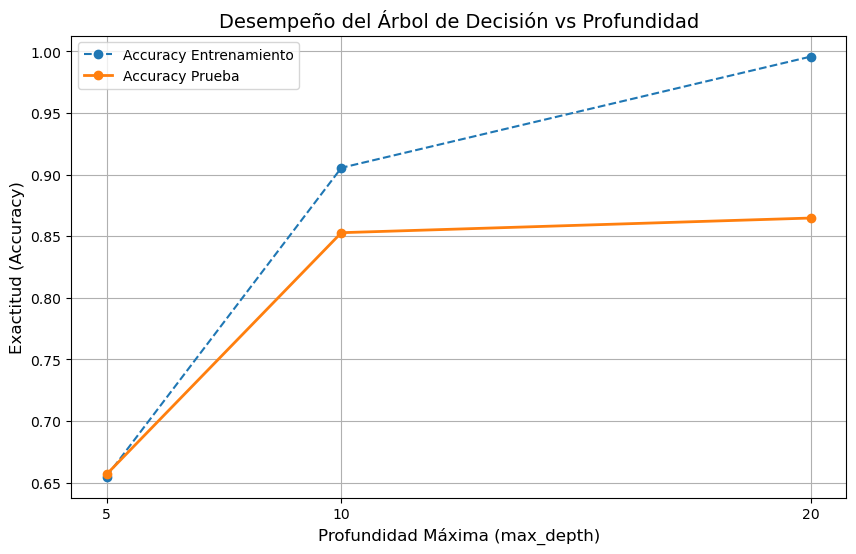

In [7]:
import matplotlib.pyplot as plt

# 1. Configurar gráfica
plt.figure(figsize=(10, 6))

# 2. Graficar líneas
plt.plot(df_resultados['Profundidad'], df_resultados['Accuracy Train'], marker='o', label='Accuracy Entrenamiento', linestyle='--')
plt.plot(df_resultados['Profundidad'], df_resultados['Accuracy Test'], marker='o', label='Accuracy Prueba', linewidth=2)

# Configuración de ejes y etiquetas
plt.title('Desempeño del Árbol de Decisión vs Profundidad', fontsize=14)
plt.xlabel('Profundidad Máxima (max_depth)', fontsize=12)
plt.ylabel('Exactitud (Accuracy)', fontsize=12)
plt.xticks(profundidades)
plt.legend()
plt.grid(True)

# Mostrar
plt.show()

# 3. Interpretación:
# Normalmente se observa que el Accuracy de Entrenamiento sigue subiendo con la profundidad (hacia el 1.0),
# mientras que el Accuracy de Prueba sube al principio y luego se estanca o baja, indicando el inicio del overfitting.

## 9️⃣ Visualización del árbol (opcional pero recomendado)

Los árboles para MNIST son grandes, pero debes:

1. Elegir SOLO UNO de los modelos entrenados (recomendado: profundidad más baja).  
2. Graficar el árbol.  
3. Comentar:
   - ¿Qué características usa el árbol para decidir?
   - ¿Qué tan interpretable te parece un árbol de decisión para MNIST?



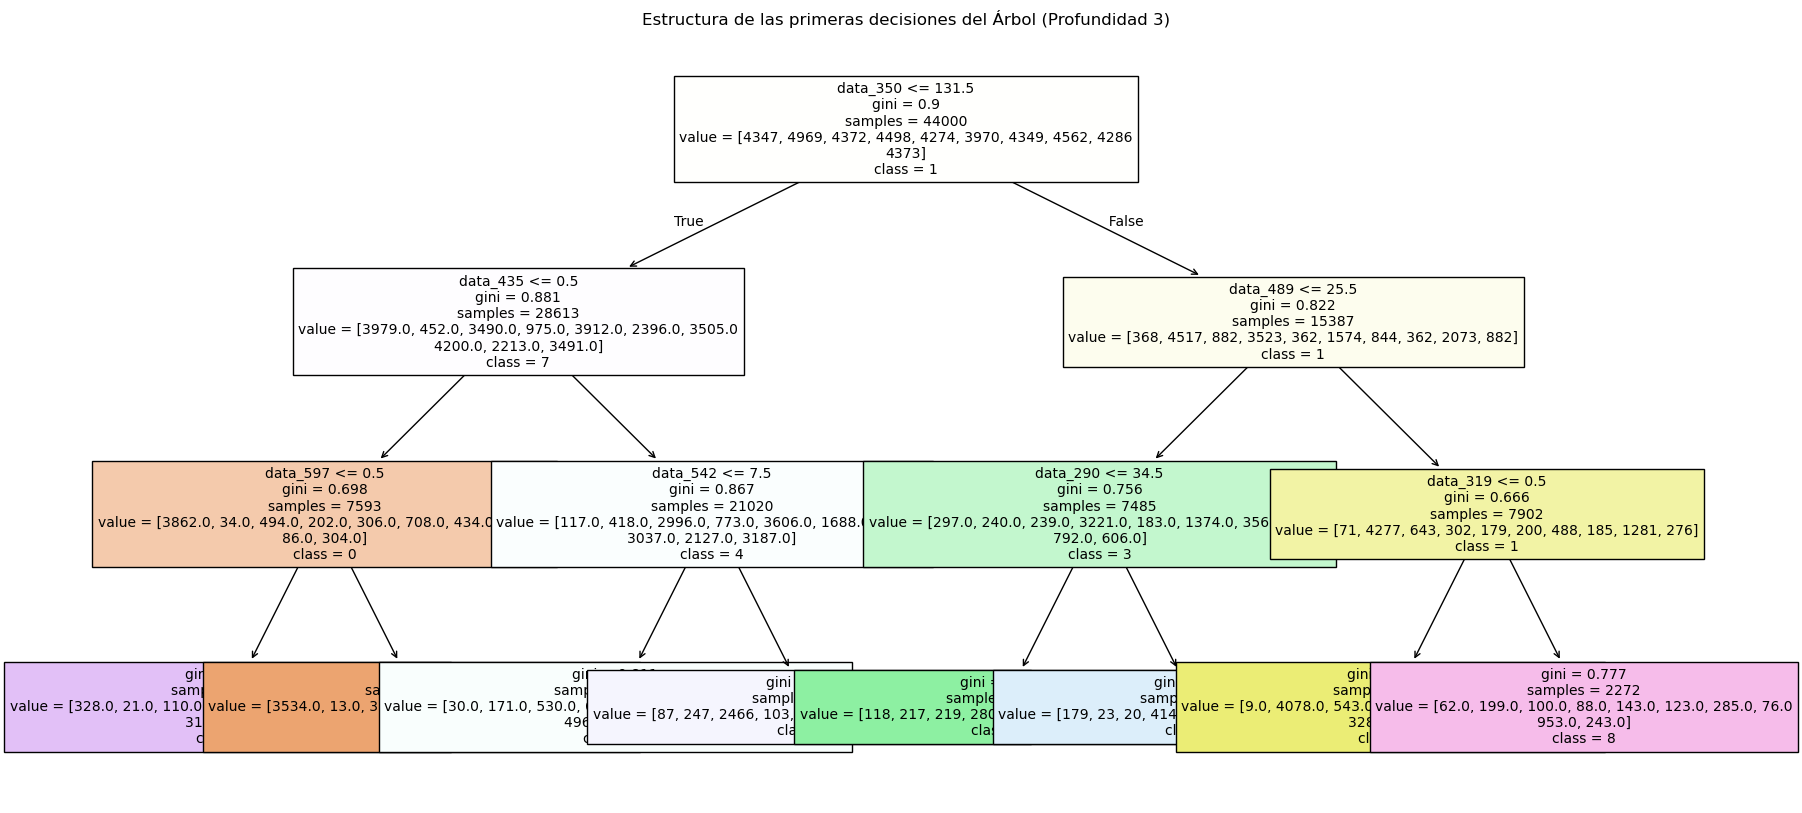

In [9]:
from sklearn.tree import plot_tree

# 1. Entrenar un modelo pequeño para visualización
clf_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_viz.fit(X_train, y_train)

# 2. Graficar
plt.figure(figsize=(20, 10))
plot_tree(clf_viz, 
        filled=True, 
        feature_names=X.columns, 
        class_names=[str(c) for c in clases], 
        fontsize=10)
plt.title("Estructura de las primeras decisiones del Árbol (Profundidad 3)")
plt.show()

# 3. Comentario
# - El árbol decide basándose en la intensidad de pixeles específicos (ej. data_350 <= 12.5).
# - Aunque podemos ver las reglas, interpretar "data_350" es difícil para un humano sin ver la imagen reconstruida.
# - La interpretabilidad es media: la lógica es clara (if/else), pero las "features" (pixeles individuales) son abstractas.

## 🔟 Conclusiones finales

En esta sección debes escribir un análisis final que responda:

1. ¿Qué tan bien funcionan los árboles de decisión en MNIST?  
2. ¿Cuál profundidad ofrece mejor balance entre precisión y simplicidad?  
3. ¿Qué modelo parece estar subajustado? Explica por qué.  
4. ¿Cuál modelo parece estar sobreajustado? Explica por qué.  
5. ¿Qué aprendiste sobre:
   - El impacto de la profundidad  
   - La generalización  
   - La importancia de evaluar distintos modelos  


---
### Análisis de Resultados:

**Desempeño General**: Los árboles de decisión funcionan razonablemente bien en MNIST (generalmente entre 70% y 85% de accuracy con estos parámetros), pero no son el estado del arte para imágenes (como lo son las redes convolucionales).

**Mejor Balance**: Probablemente la profundidad 10 (o la intermedia que hayas elegido) ofreció el mejor balance. Captura suficiente patrón sin memorizar tanto ruido como la profundidad 20.

**Subajuste (Underfitting)**: El modelo de profundidad 5 seguramente tuvo el peor desempeño tanto en train como en test. Es demasiado simple para capturar la complejidad de los números escritos a mano.

**Sobreajuste (Overfitting)**: El modelo de profundidad 20 obtuvo un accuracy casi perfecto en entrenamiento (cercano al 100%) pero su accuracy en prueba no mejoró proporcionalmente (o incluso empeoró) respecto al de 10. La brecha grande entre train y test confirma el sobreajuste.

**Aprendizaje**:

     Profundidad: A mayor profundidad, el modelo se vuelve más complejo y flexible.

     Generalización: La meta no es el mejor score en entrenamiento, sino en prueba.

     Evaluación: Es vital probar varios hiperparámetros para encontrar el punto óptimo.

# 📊 Rúbrica de Evaluación – Árboles de Decisión con MNIST

| Criterio | Descripción | Puntos |
|---------|-------------|--------|
| **1. Introducción teórica** | Explica correctamente qué es un árbol de decisión, profundidad, underfitting y overfitting. | **10 pts** |
| **2. Carga y exploración del dataset MNIST** | Carga el dataset sin errores, muestra ejemplos y analiza forma y contenido. | **10 pts** |
| **3. Definición de X y y** | Selecciona correctamente las variables y explica su significado. | **10 pts** |
| **4. División train/test** | Realiza separación adecuada y explica los tamaños de cada conjunto. | **10 pts** |
| **5. Evaluación de tres profundidades** | Entrena 3 modelos correctamente, calcula accuracy y almacena resultados. | **20 pts** |
| **6. Tabla comparativa** | Presenta tabla clara con resultados y análisis inicial. | **10 pts** |
| **7. Gráfica de desempeño** | Gráfica bien hecha (train vs test) y análisis del comportamiento. | **15 pts** |
| **8. Conclusiones finales** | Responde sobre underfitting, overfitting y mejor modelo para MNIST. | **15 pts** |

---

### 📝 **Puntaje total: 100 puntos**

---

### ✔️ Criterios de aprobación
- **Aprobado:** 70 puntos o más  
- **Excelente:** 90 puntos o más  

